In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
def ParseAverageMetrics(fileName, dir):
    parsedData = {}
    
    fullPath = f"{dir}\{fileName}"
    
    df = pd.read_csv(fullPath)
    # print(df.head())
    # print(df.iloc[0]['Value'])
    
    # 1. Nodal Efficiency
    nodalString = df.iloc[0]['Value']
    valueDict = {}
    for item in nodalString.split(';'):
        if item.strip():  # Ignore empty strings
            key, val = item.split(':')
            valueDict[int(key.strip())] = float(val.strip())

    parsedData['Nodal Efficiency'] = valueDict
    
    # 2. Global Efficiency
    globalEfficiency = float(df.iloc[1]['Value'])
    parsedData['Global Efficiency'] = globalEfficiency
    
    # 3. Degree Centrality
    degreeCentralityString = df.iloc[3]['Value']
    degreeValueDict = {}
    for item in degreeCentralityString.split(';'):
        if item.strip():
            key, value = item.split(':')
            degreeValueDict[int(key.strip())] = float(value.strip())
    
    parsedData['Degree Centrality'] = degreeValueDict
    
    # 4. Average Clustering Coefficient
    averageClustering = float(float(df.iloc[2]['Value']))
    parsedData['Average Clustering'] = averageClustering
    
    return parsedData
    
    

<string>:4: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<string>:4: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
C:\Users\mattm\AppData\Local\Temp\ipykernel_34936\219466156.py:4: SyntaxWarning: invalid escape sequence '\{'
  fullPath = f"{dir}\{fileName}"


In [38]:
def ParsePhenotypicData(fileName, pathToPhenotypicCSV):
    phenotypicData = {}
    df = pd.read_csv(pathToPhenotypicCSV)
    
    # print(df.head())
    resultRow = df[df['FILE_ID'] == fileName]
    
    if not resultRow.empty:
        # Define the columns you want to check and assign
        columns_to_check = ['FIQ', 'HANDEDNESS_CATEGORY', 'AGE_AT_SCAN', 'SEX']

        for col in columns_to_check:
            # Check if the value is NaN and handle accordingly
            if pd.isna(resultRow[col].values[0]):  # Check for NaN
                if col in ['FIQ', 'AGE_AT_SCAN', 'SEX']:  # Numeric columns
                    phenotypicData[col] = -9999
                else:  # Non numeric values 'empty'
                    phenotypicData[col] = "Unknown"
            else:
                if col in ['FIQ', 'AGE_AT_SCAN', 'SEX']:  # Numeric columns
                    phenotypicData[col] = float(resultRow[col].values[0])
                else:  # Non-numeric columns
                    phenotypicData[col] = resultRow[col].values[0]

        phenotypicData['DX_GROUP'] = resultRow['DX_GROUP'].values[0]
    return phenotypicData
    
    # print(df.head())

In [39]:
def FindNodesFromBrodmanns(ba_nums: list, pathToMapping):
    df = pd.read_csv(pathToMapping)
    # print(df.head())
    
    results = {}
    for ba in ba_nums:
        
        matchingRows = df[df['ba.label'].str.extract(r'(\d+)')[0].astype(int) == ba]
        
        roiNums = matchingRows['ROI number'].tolist()
        results[ba] = roiNums
        
    return results

In [40]:
import csv
import os
def OutputGraphMetrics(data, dir, fileName):
    # Ensure the directory exists
    os.makedirs(dir, exist_ok=True)
    
    # Remove _mat.txt
    
    # Modify the filename to end with a particular extension
    fileName = f"{fileName}_metrics.csv"
    # Construct the full path for the output file
    outputPath = os.path.join(dir, fileName)
    
    # Write data to a CSV file
    with open(outputPath, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Metric", "Value"])  # Write header
        
        for key, value in data.items():
            if isinstance(value, dict):
                # Convert dictionary to string for storage
                value_str = "; ".join([f"{k}: {v}" for k, v in value.items()])
                writer.writerow([key, value_str])
            else:
                writer.writerow([key, value])


In [41]:
# # We are going to average them here.
# import os

# from glob import glob
# outDir = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output\Averaged"
# folders = [R"10%\NetworkMetrics", R"15%\NetworkMetrics", R"20%\NetworkMetrics", R"25%\NetworkMetrics", R"30%\NetworkMetrics"]

# file_list = [os.path.basename(file) for file in glob(os.path.join(folders[0], "*.csv"))]

# print(file_list)

# counter = 0
# for fileName in file_list:
#     # dfs = []
#     metrics = []
    
#     for folder in folders:
#         file_path = os.path.join(folder, fileName)
#         if os.path.exists(file_path):
#             # dfs.append(pd.read_csv(file_path))
#             metrics.append(ParseMetrics(file_path))
    

#     averageMetrics = {
#         "Nodal Efficiency" : {},
#         "Global Efficiency" : 0,
#         "Average Clustering" : 0,
#         "Degree Centrality" : {}
#                     }
#     allNodes = metrics[0]['Nodal Efficiency'].keys()
#     # print(allNodes)
#     for node in allNodes:
#         averageMetrics['Nodal Efficiency'][node] = sum(d['Nodal Efficiency'][node] for d in metrics) / len(metrics)
#         averageMetrics["Degree Centrality"][node] = sum (d['Degree Centrality'][node] for d in metrics) / len(metrics)
#         averageMetrics['Global Efficiency'] = sum (d['Global Efficiency'] for d in metrics) / len(metrics)
#         averageMetrics["Average Clustering"] = sum(d['Average Clustering'] for d in metrics) / len(metrics)
        
#     # print(averageMetrics)
#     strippedFileName = fileName.split('_rois')[0]
#     print(strippedFileName)
    
#     OutputGraphMetrics(averageMetrics, outDir, strippedFileName)
    


In [42]:
import os
metricsDir =  R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output\Averaged"
pathToPheno = R"C:\GIT\Connectomics\Research_Project\Phenotypic_V1_0b_preprocessed1.csv"

# strippedFileName = "Leuven_2_0050722"

fileNames = os.listdir(metricsDir)

columns = [
    "Node", "Participant", "IQ", "Age", "Handedness", "Sex", 
    "Nodal EFficiency", "Global Efficiency", "Average Clustering", "Degree Centrality"
]




# node = 83

ba_nums = [6, 7, 9, 10, 18, 19, 21, 37, 39, 40, 45, 46, 47]
pathToMap = R"C:\GIT\Connectomics\Research_Project\labeled_regions_ba.csv"

brodmannMapping = FindNodesFromBrodmanns(ba_nums, pathToMap) # Provides a mapping between ba: nodes that overlap
print(brodmannMapping)
# print(brodmannMapping)
# THIS IS MESSED UP!


for ba, nodes in brodmannMapping.items():
    results_df = pd.DataFrame(columns=columns)
    dataframes = []
    # key is the ba, value is a list containing CC400 nodes mapping to said ba
    print(ba, nodes)
    
    # For each node
    # for filename in files
    for metricsFileName in fileNames:

        
        strippedFileName = metricsFileName.split('_rois')[0]
        strippedFileName = metricsFileName.split('_metrics')[0]
        # print(strippedFileName)
        metrics = ParseAverageMetrics(metricsFileName, metricsDir)
        # print(metrics['Nodal Efficiency'])
        phenotypic = ParsePhenotypicData(strippedFileName, pathToPheno)
        # print(phenotypic)
        # print(metrics)
        validParticipant = True
        
        for key, value in phenotypic.items():
            if value == -9999 or value == "Unknown" or metrics['Average Clustering'] == 0:
                validParticipant = False
        
        
        # print(node_ids)
        if not validParticipant:
            print(f"Skipping: {strippedFileName}")
            continue
        for node_id in metrics['Nodal Efficiency'].keys():
            if node_id in nodes:
                temp_df = pd.DataFrame([{
                "Participant ID": strippedFileName,
                "IQ": phenotypic.get("FIQ", "N/A"),
                "Node ID": node_id,
                "BA" : ba,
                "Age": phenotypic.get("AGE_AT_SCAN", "N/A"),
                "Handedness": phenotypic.get("HANDEDNESS_CATEGORY", "N/A"),
                "Sex": phenotypic.get("SEX", "N/A"),
                "DX_Group": phenotypic.get("DX_GROUP", "N/A"),
                "Nodal Efficiency": metrics["Nodal Efficiency"][node_id],
                "Degree Centrality": metrics["Degree Centrality"][node_id],
                "Average Clustering": metrics["Average Clustering"],
                "Global Efficiency": metrics["Global Efficiency"],
                
                }])
                dataframes.append(temp_df)
    final_df = pd.concat(dataframes, ignore_index=True)
    outputFile = f"output_ba_{ba}.csv"
    final_df.to_csv(outputFile, index=False)
    print(f"Saved to: {outputFile}")
    



{6: [7, 16, 28, 56, 72, 81, 113, 129, 145, 147, 150, 159, 165, 167, 174, 187, 210, 215, 241, 281, 291, 293, 304, 316, 334, 345, 352, 393], 7: [51, 61, 104, 118, 181, 211, 240, 263, 275, 287, 323, 327, 355, 360, 376, 381], 9: [53, 88, 96, 116, 178, 212, 249, 265, 279, 289, 386, 400], 10: [2, 60, 80, 84, 106, 142, 160, 172, 190, 202, 232, 235, 254, 264, 297, 379, 387, 392, 397], 18: [24, 43, 58, 62, 63, 76, 78, 92, 114, 136, 144, 151, 176, 180, 204, 225, 253, 269, 286, 318, 321, 332, 340, 351, 353, 362, 367, 378], 19: [1, 6, 13, 18, 26, 27, 37, 70, 105, 108, 146, 169, 173, 183, 219, 229, 231, 234, 282, 294, 295, 301, 326, 335, 357, 372, 377], 21: [36, 52, 57, 69, 155, 197, 209, 228, 280, 364, 374], 37: [17, 41, 55, 83, 94, 97, 110, 119, 127, 134, 175, 179, 188, 195, 218, 227, 230, 247, 251, 258, 259, 276, 278, 290, 296, 310, 315, 322, 346, 349, 361], 39: [8, 30, 73, 120, 135, 138, 141, 164, 189, 207, 217, 252, 308, 314, 319, 341, 356, 395], 40: [49, 65, 68, 102, 115, 199, 206, 237, 250, 

8162
583
74
                                 OLS Regression Results                                
Dep. Variable:                     IQ   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              1488.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):                    2.68e-50
Time:                        14:27:44   Log-Likelihood:                         -343.61
No. Observations:                  74   AIC:                                      689.2
Df Residuals:                      73   BIC:                                      691.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

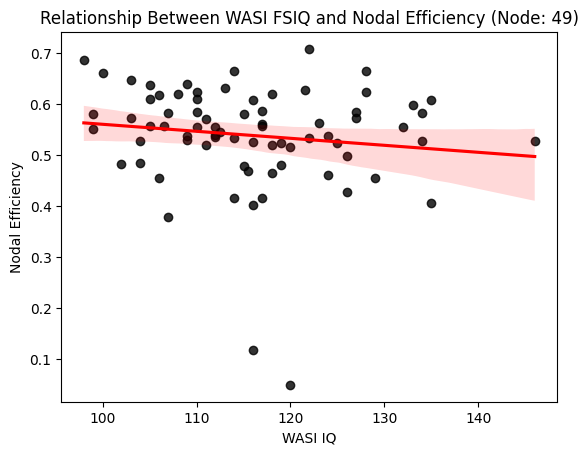

In [ ]:
import pandas as pd
import os

# Load all CSV files into one DataFrame
path = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output\BA\output_ba_40.csv"
df = pd.read_csv(path)

import statsmodels.api as sm

node = 49

print(len(df))

filtered_data = df[df['Node ID'] == node]

print(len(filtered_data))

filtered_data = filtered_data[filtered_data['Age'] >= 18]

filtered_data = filtered_data[filtered_data['Age'] <= 30]

filtered_data = filtered_data[filtered_data['DX_Group'] == 1]

print(len(filtered_data))

X = filtered_data['IQ']
y = filtered_data['Nodal Efficiency']

x = sm.add_constant(y)
model = sm.OLS(X, y).fit()

print(model.summary())

sns.regplot(x='IQ', y='Nodal Efficiency', data=filtered_data, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Relationship Between WASI FSIQ and Nodal Efficiency (Node: {})".format(node))
plt.xlabel("WASI IQ")
plt.ylabel("Nodal Efficiency")
plt.show()



Error processing BA output_ba_10, Node 2: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 60: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 80: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 84: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 106: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 142: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 160: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 172: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 190: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 202: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 232: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 235: name 'output_dir' is not defined
Error processing BA output_ba_10, Node 254: name 'output_dir' is not defined
Erro

KeyboardInterrupt: 

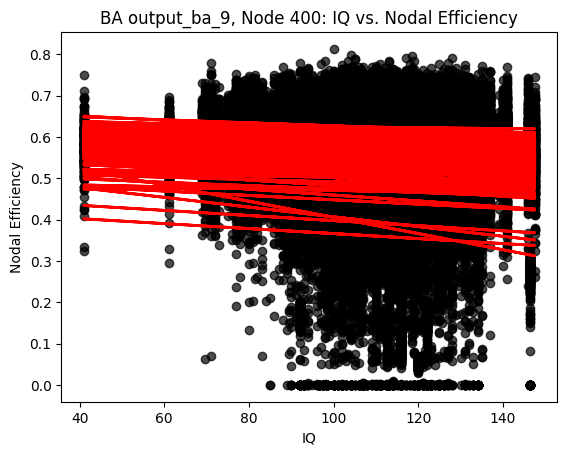

In [47]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Function to perform regression and plot
def analyze_node(df, ba, node):
    # Iterate through each BA and Node
    for ba in data['BA'].unique():
        for node in data['Node ID'].unique():
            subset = data[(data['BA'] == ba) & (data['Node ID'] == node)]
            
            # Check if subset is empty
            if subset.empty or len(subset) < 2:  # Ensure enough data points for regression
                print(f"Not enough data for BA {ba}, Node {node}. Skipping...")
                continue
            
            X = subset['IQ']
            Y = subset['Nodal Efficiency']
            X = sm.add_constant(X)
            
            try:
                # Fit linear regression
                model = sm.OLS(Y, X).fit()

                # Save scatter plot with regression line
                plt.scatter(subset['IQ'], subset['Nodal Efficiency'], color='black', alpha=0.7)
                plt.plot(subset['IQ'], model.predict(X), color='red', linewidth=2)
                plt.title(f'BA {ba}, Node {node}: IQ vs. Nodal Efficiency')
                plt.xlabel('IQ')
                plt.ylabel('Nodal Efficiency')
                plt.savefig(os.path.join(output_dir, f'BA_{ba}_Node_{node}.png'))
                plt.close()
            except Exception as e:
                print(f"Error processing BA {ba}, Node {node}: {e}")


# Example usage
analyze_node(data, ba=40, node=49)